<a href="https://colab.research.google.com/github/labib2537/Data-Mining-and-ML/blob/main/LabFinal_Exam.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [19]:
import numpy as np
import cv2
import PIL.Image as Image
import os
import matplotlib.pylab as plt
import tensorflow as tf
import tensorflow_hub as hub

from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential

In [20]:
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [21]:
fish_folder=r"/content/drive/MyDrive/Summer_2021/ML/Fish"
catagories=['Red_Sea_Bream','Sea_Bass','Shrimp','Striped_Red_Mullet','Trout']

In [22]:
IMAGE_SHAPE=(224,224)
data=[]
for Catagories in catagories:
  Folder=os.path.join(fish_folder,Catagories)
  label=catagories.index(Catagories)

  for img in os.listdir(Folder):
    image=os.path.join(Folder,img)
    image_arr=cv2.imread(image)
    image_arr=cv2.resize(image_arr,IMAGE_SHAPE)
    data.append([image_arr,label])

In [23]:
x=[]
y=[]
for feature,label in data :
  x.append(feature)
  y.append(label)

x=np.array(x)
y=np.array(y)

x=x/255
x

array([[[[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         ...,
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]],

        ...,

        [[0.        , 0.        , 0.        ],
         [0.        , 0.        , 0.        ]

In [24]:
x.shape

(2000, 224, 224, 3)

In [25]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,random_state=0)

# **Creating A Model Using Transfer Learning**

In [26]:
previous_model=hub.KerasLayer(
    "https://tfhub.dev/google/tf2-preview/mobilenet_v2/feature_vector/4",
    input_shape=IMAGE_SHAPE+(3,),
    trainable=False
)

In [27]:
number_of_fish=5
model = tf.keras.Sequential([
                 previous_model,
                 tf.keras.layers.Dense(number_of_fish)          
])
model.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
keras_layer_1 (KerasLayer)   (None, 1280)              2257984   
_________________________________________________________________
dense_1 (Dense)              (None, 5)                 6405      
Total params: 2,264,389
Trainable params: 6,405
Non-trainable params: 2,257,984
_________________________________________________________________


In [28]:
model.compile(
    optimizer="adam",
    loss=tf.keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=['acc']
)

In [29]:
model.fit(x_train,y_train,epochs=5)

Epoch 1/5
47/47 [==============================] - 42s 812ms/step - loss: 0.5813 - acc: 0.8140
Epoch 2/5
47/47 [==============================] - 38s 814ms/step - loss: 0.0948 - acc: 0.9927
Epoch 3/5
47/47 [==============================] - 38s 813ms/step - loss: 0.0525 - acc: 0.9987
Epoch 4/5
47/47 [==============================] - 38s 811ms/step - loss: 0.0346 - acc: 0.9993
Epoch 5/5
47/47 [==============================] - 38s 816ms/step - loss: 0.0254 - acc: 1.0000


In [30]:
model.evaluate(x_test,y_test)

16/16 [==============================] - 13s 795ms/step - loss: 0.0262 - acc: 0.9960


[0.026189500465989113, 0.9959999918937683]

In [31]:
from sklearn.metrics import  classification_report
y_pred=model.predict(x_test)
y_pred_class=[np.argmax(element) for element in y_pred]
print("Classification Report : \n", classification_report(y_test,y_pred_class))

Classification Report : 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00       106
           1       1.00      0.99      1.00       103
           2       1.00      0.99      0.99        93
           3       0.99      1.00      1.00       104
           4       0.99      1.00      0.99        94

    accuracy                           1.00       500
   macro avg       1.00      1.00      1.00       500
weighted avg       1.00      1.00      1.00       500



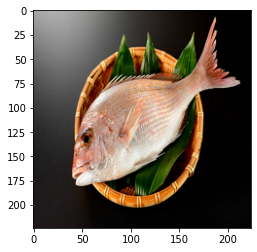

In [32]:
image=Image.open("/content/drive/MyDrive/Summer_2021/ML/test_fish.jpg").resize(IMAGE_SHAPE)
plt.imshow(image)

In [33]:
fish_img=np.array(image)/255
fish_img=fish_img[np.newaxis, ...]

In [34]:
result=model.predict(fish_img)
Max_result=np.argmax(result)

image_labels=[]
with open("/content/drive/MyDrive/Summer_2021/ML/Fish_Labels.txt","r") as f:
  image_labels=f.read().splitlines()
image_labels[Max_result]

'Red_Sea_Bream'